In [44]:

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/card_transdata.csv")
print(df.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [46]:
df.shape

(1000000, 8)

In [47]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


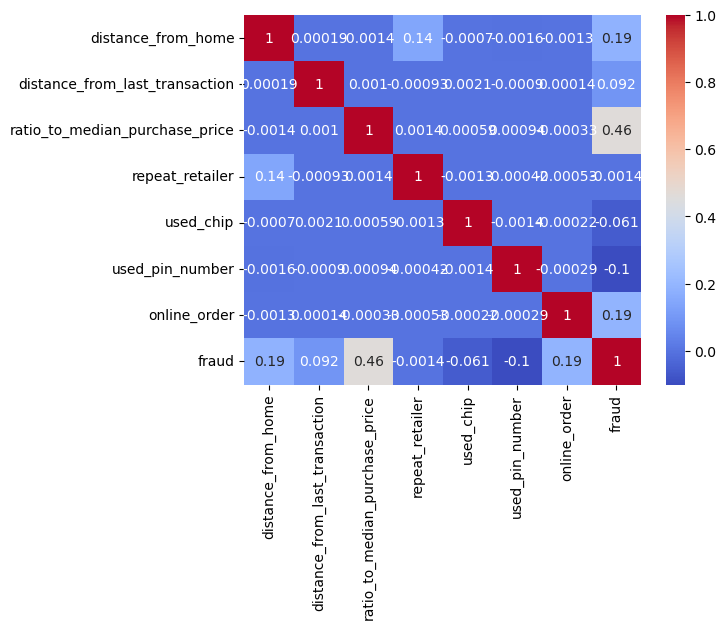

In [48]:
corr_matrix = df.corr()
# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

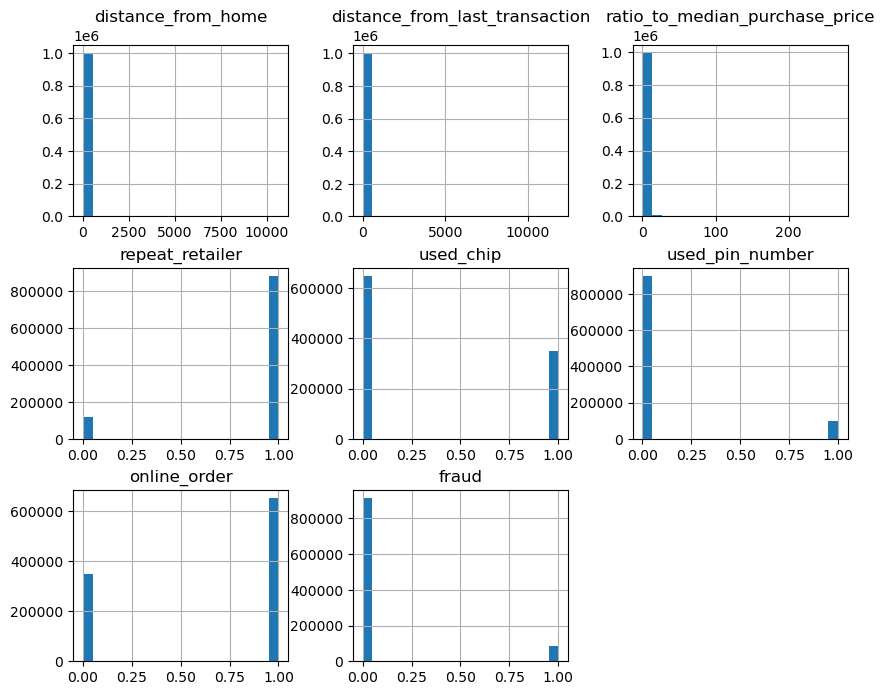

In [49]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(10, 8))
plt.show()

In [50]:
y = df['fraud']
X = MS(['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']).fit_transform(df) 
#X = df.drop('fraud', axis='columns')
#X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-0.0541,0.001000,-68.166,0.0
distance_from_home,0.0008,0.000004,229.163,0.0
distance_from_last_transaction,0.0010,0.000009,109.958,0.0
ratio_to_median_purchase_price,0.0467,0.000084,556.705,0.0
repeat_retailer,-0.0258,0.001000,-35.097,0.0
used_chip,-0.0364,0.000000,-73.917,0.0
used_pin_number,-0.0942,0.001000,-120.766,0.0
online_order,0.1139,0.000000,231.369,0.0


In [51]:
# Perform regression
model = sm.OLS.from_formula('fraud ~ distance_from_home * distance_from_last_transaction', data=df)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  fraud   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                 1.529e+04
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:18:17   Log-Likelihood:            -1.3217e+05
No. Observations:             1000000   AIC:                         2.644e+05
Df Residuals:                  999996   BIC:                         2.644e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [52]:
# Perform regression with variableinteractions
model = sm.OLS.from_formula('fraud ~ distance_from_last_transaction * ratio_to_median_purchase_price* distance_from_home* used_chip', data=df)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  fraud   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                 2.645e+04
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:18:18   Log-Likelihood:                 12463.
No. Observations:             1000000   AIC:                        -2.489e+04
Df Residuals:                  999984   BIC:                        -2.471e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [53]:
#Try the KNN model
# Select predictors (excluding the last column)
predictors = df.iloc[:, :-1]
# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())
# Create a random vector of True and False values
np.random.seed(4)
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
training_X = predictors_standardized[split]

# Define the training set for Y (response)
training_Y = df.loc[split, 'fraud']

# Define the testing set for X (predictors)
testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
testing_Y = df.loc[~split, 'fraud']

   distance_from_home  distance_from_last_transaction  \
0            0.477882                       -0.182849   
1           -0.241607                       -0.188094   
2           -0.329369                       -0.163733   
3           -0.372854                        0.021806   
4            0.268572                       -0.172968   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        0.043491         0.366584   1.361576   
1                       -0.189300         0.366584  -0.734443   
2                       -0.498812         0.366584  -0.734443   
3                       -0.522048         0.366584   1.361576   
4                        0.142373         0.366584   1.361576   

   used_pin_number  online_order  
0        -0.334458     -1.364425  
1        -0.334458     -1.364425  
2        -0.334458      0.732909  
3        -0.334458      0.732909  
4        -0.334458      0.732909  


In [54]:
knn = KNeighborsClassifier(n_neighbors =5)
knn_fit=knn.fit(training_X,training_Y)
knn_pred = knn.predict(testing_X)
confusion_table(knn_pred,testing_Y)

Truth,0.0,1.0
Predicted,,
0.0,228984,204
1.0,117,21906


In [55]:
prediction_accuracy = knn.score(testing_X,testing_Y)
print(prediction_accuracy)

0.9987221897130301


## Working with imbalanced data

We can see that KNN was really effective, however we still fail to detect 204/21906 cases of fraud, almost 1 in 100. 

Can we get closer to understanding the predictors of credit card fraud by balancing out the data through subsampling? Subsampling will repeat the analysis using a dataframe that is 50/50 fraud and not-fraud.

This will help us enhance the fraud signal and create a more proactive fraud catching model. It will also help clarify the direction and relative magnitude of correlations between fraud and the predictors.

In [58]:
s = 5
np.random.seed(s) 

df_fraud = df.loc[df.fraud==True]
df_full_notfraud = df.loc[df.fraud==False]
undersplit = np.random.choice([True, False], size=len(df_full_notfraud), replace=True, p=[0.5, 0.5])
df_under_notfraud = df_full_notfraud[undersplit][:len(df_fraud)]

df_subsample_0 = pd.concat([df_under_notfraud,df_fraud])
df_subsample = df_subsample_0.sample(frac=1, random_state=s)

print(len(df_subsample) == 2*len(df_fraud))
df_subsample

df_subsample.to_csv('subsample.csv', index=False)

True


We now have the data frame ```df_subsample``` to work with. ```df_subsample``` has data containing all of the frauds from the original dataset as well as an equal number of randomly selected non-frauds. If we change the seed parameter s, then an entirely different set of non-frauds can be drawn. This can help us to vary the outcomes of the experiment which will allow us to bootstrap measure the standard error of our correlations and our predicted accuracy.

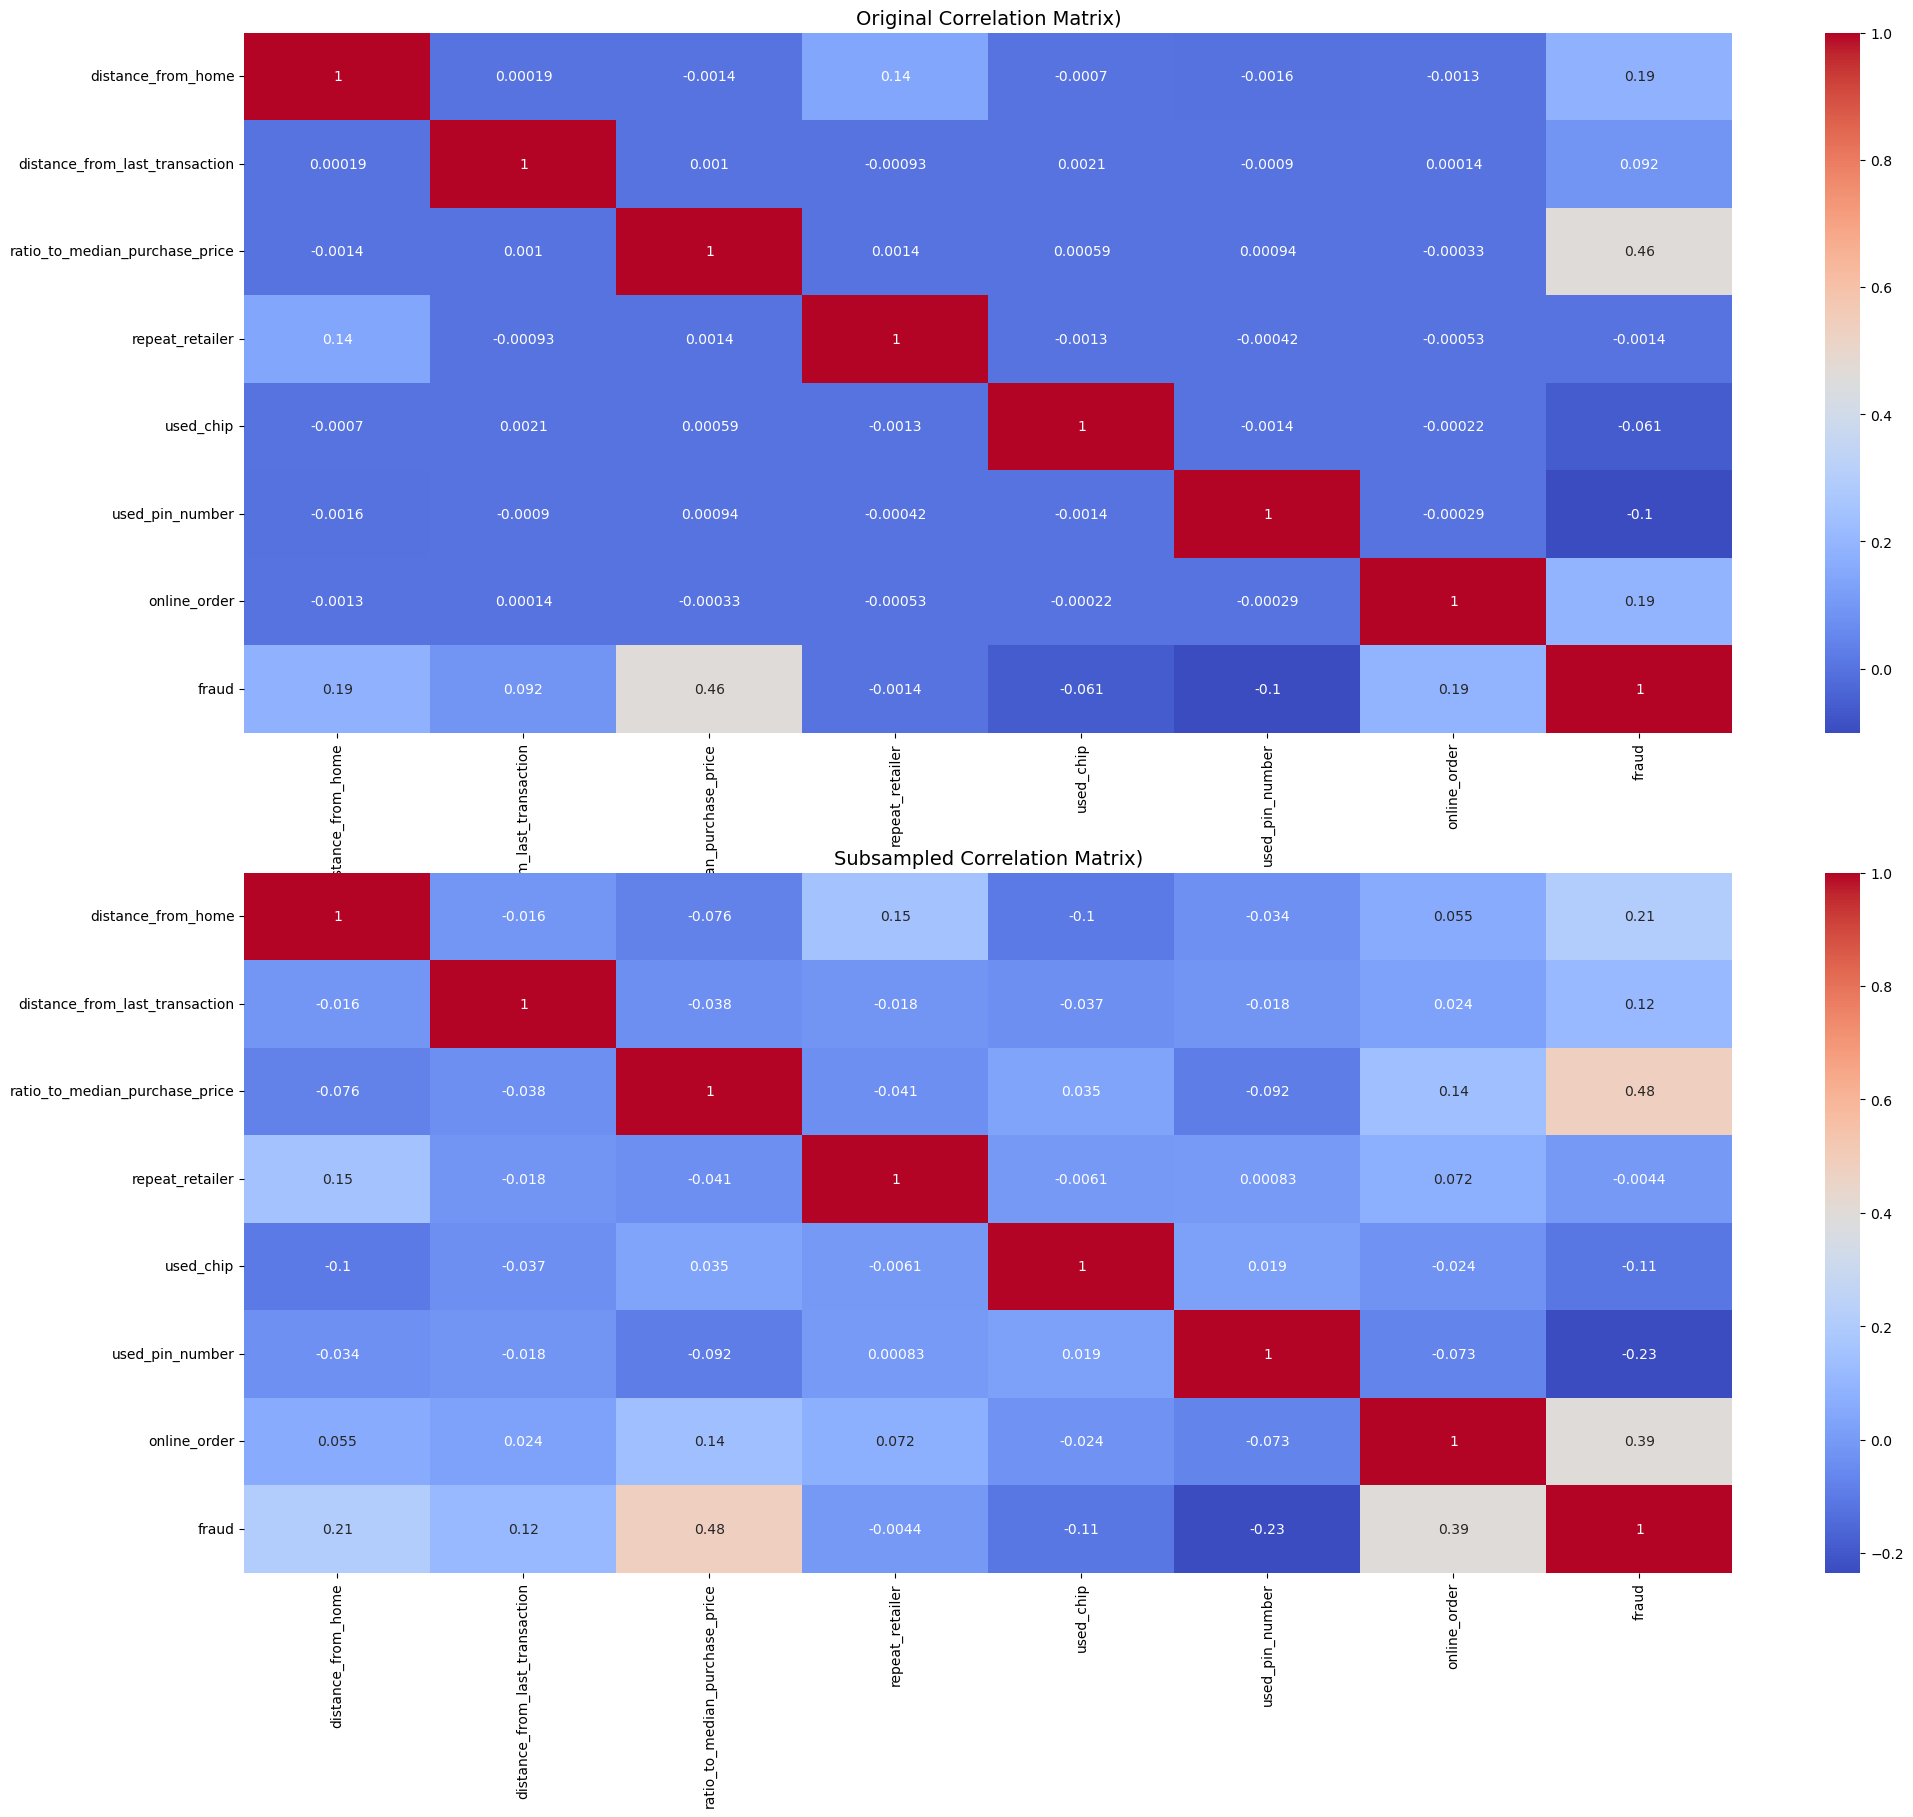

In [57]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title("Original Correlation Matrix)", fontsize=14)

corr_subsample_matrix = df_subsample.corr()
sns.heatmap(corr_subsample_matrix, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Subsampled Correlation Matrix)', fontsize=14)
plt.show()

Shown above are the correclation matrices for our dataframes. Wee see the signal of our correlations has been enhanced. We might expect that fitting on this subsample and testing on the full_sample we will reduce the false_negative (not fraud labels applied to frauds) by a factor of 1/50. By the same logic this validation should increase the false positives (fraud labels applied to non_frauds) 50times. We would then have a model that reduces undetected frauds from 1 missed fraud in 100 frauds to 1 missed fraud in 4,000 frauds.

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the CSV file
file_path = 'subsample.csv'
data = pd.read_csv(file_path)

# Define feature columns and target column
feature_columns = [
    'distance_from_home', 
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price', 
    'repeat_retailer', 
    'used_chip', 
    'used_pin_number', 
    'online_order'
]
target_column = 'fraud'

# Split the data into features (X) and target (y)
X = data[feature_columns]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9415926166050113
Confusion Matrix:
[[24264  1712]
 [ 1351 25115]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     25976
         1.0       0.94      0.95      0.94     26466

    accuracy                           0.94     52442
   macro avg       0.94      0.94      0.94     52442
weighted avg       0.94      0.94      0.94     52442



This is an analysis of a logistic regression model applied to a dataset for detecting fraudulent transactions. The dataset includes features such as the distance from home, distance from the last transaction, the ratio to median purchase price, repeat retailer status, chip usage, pin number usage, and whether the order was made online. The target variable is a binary indicator of fraud. The model achieved an accuracy of 94.16%, indicating strong performance in identifying fraudulent transactions.

Detailed Explanation
1. Dataset Overview
The dataset consists of the following features:

distance_from_home: The distance of the transaction location from the cardholder's home.
distance_from_last_transaction: The distance from the location of the last transaction.
ratio_to_median_purchase_price: The ratio of the transaction amount to the median purchase price.
repeat_retailer: A binary variable indicating if the retailer has been visited before.
used_chip: A binary variable indicating if the transaction used a chip.
used_pin_number: A binary variable indicating if a PIN number was used.
online_order: A binary variable indicating if the transaction was made online.
fraud: The target variable, indicating whether the transaction was fraudulent (1) or not (0).

2. Data Preprocessing
The dataset was split into features (X) and target (y).
The data was divided into training and testing sets, with 70% used for training and 30% for testing.
Feature scaling was applied using StandardScaler to standardize the features.

3. Model Training and Evaluation
A logistic regression model was trained on the standardized training data. The model's performance was evaluated on the test set, yielding the following results:

Accuracy: 94.16%

Confusion Matrix:


[[24264  1712]
 [ 1351 25115]]


True Negatives (TN): 24,264 transactions correctly identified as non-fraudulent.
False Positives (FP): 1,712 transactions incorrectly identified as fraudulent.
False Negatives (FN): 1,351 transactions incorrectly identified as non-fraudulent.
True Positives (TP): 25,115 transactions correctly identified as fraudulent.
Classification Report:


Precision:
Class 0 (Non-fraud): 95%
Class 1 (Fraud): 94%

Recall:
Class 0 (Non-fraud): 93%
Class 1 (Fraud): 95%

F1-score:
Class 0 (Non-fraud): 94%
Class 1 (Fraud): 94%

Conclusion

The logistic regression model demonstrates strong performance with an accuracy of 94.16%. High precision and recall for both fraudulent and non-fraudulent transactions indicate that the model effectively minimizes false positives and false negatives. This balance ensures reliable identification of fraud, which is critical for practical applications in fraud detection.

The analysis indicates that the model is well-suited for detecting fraudulent transactions based on the provided features. Future work could explore additional features, advanced modeling techniques, or further data preprocessing steps to enhance performance.